# Introduction
In this notebook we solve Schroedinger's equation for the random potentials generated in the "potentials.ipynb' jupyter notebook.

We solve for the eigenspectrum by representing the Hamiltonian for the system in the basis of "particle in a box" states. Let $H_0$ be the Hamiltonian for the box potential $V_0(x) = 0,\,\,|x|<1$ and $V_0\rightarrow \infty,\,\,{\rm else}$. Schroedinger's equation for the box potential is

$$
(T+V_0)|\psi^0_n\rangle = E_n^0 |\psi^0_n\rangle.
$$

The position-space box eigenstates are

$$
\psi^0_n(x) = \sin\left[\frac{n\pi}{2}(x+1)\right],\,\, |x|\leq 1
$$

Outside the box, the eigenfunctions are zero. The eigenvalues are (using units where $\hbar = m = 1$):

$$
E_n^0 = \frac{n^2\pi^2}{8}
$$


We wish to find the spectrum of the Hamiltonian with the randomly generated potential V. Schroedinger's equation is

$$
\left[T+V_0 + (V - V_0)\right]|\psi\rangle = E |\psi\rangle.
$$

We now expand $|\psi_n\rangle$ in box states:

$$
|\psi\rangle = \sum\limits_{n=1}^\infty a_n |\psi_n^0\rangle.
$$

Projecting out the $\langle\psi_n^0|$ component, we obtain

$$
\sum\limits_{m = 1}^\infty\left[E_n^0\delta_{nm} + \langle\psi_n^0|(V-V_0)| \psi_m^0 \rangle\right] a_m = E_n a_n
$$

Thus, the problem of calculating the spectrum reduces to finding the eigensystem of the matrix $H$ with elements

$$
(H)_{nm} = E_n^0\delta_{nm} + \langle\psi_n^0|(V-V_0)| \psi_m^0 \rangle
$$

As a final step, we note that we have randomly generated the potentials as Fourier series:
$$
V(x) = \sum\limits_{k=1}^{n_{\rm max}} \left[V_n^S\sin(n\pi x) + V_n^C \cos(n\pi x)\right]
$$
Thus, the calculation of the matrix elements of $H$ can be expressed as calculating the matrix elements of the Fourier components, all of which can be done analytically. This we have done in the mathematica notebook titled 'matrixElements.nb'. We use those results here.

# Preliminaries

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import normal, randint
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import legval
import pprint

# Number of basis states for the wavefunctions
NBW = 40
nbws = np.arange(1, NBW+1)
# Number of potentials:
NV = int(1E4)
# Number of basis states in the potential:
NB = 10
ns = np.arange(1, NB+1)
# lambda (variance of Legendre coefficients):
lam = 0.75
# The variance of the n=0 legendre coefficient V_0:
V20 = 10

# Input file:
filepath = "../Data/potentials_NV" + str(NV) \
    + "_NB" + str(NB) + "_lam" \
    + str(lam) + "_V20" + str(V20) + ".npy"
VSns, VCns = np.load(filepath)
print(np.shape(VSns))
print(np.shape(VCns))

(10000, 10)
(10000, 10)


# Matrix elements of Fourier components

In [2]:
def matelS(indices):
    n,m,k = indices
    if(m==n-2*k or m==n+2*k or m==-n + 2*k):
        return 0
    else:
        return (-8*(-1)**k*(-1 + (-1)**(m + n))*k*m*n)/ \
            ((2*k + m - n)*(2*k - m + n)*(-2*k + m + n)* \
             (2*k + m + n)*np.pi)

def matelC(indices):
    n,m,k = indices
    if m==n-2*k or m==n+2*k:
        return (-1)**k / 2.
    elif m==-n+2*k:
        return -(-1)**k / 2.
    else:
        return 0.

Precache all of the Fourier component matrix elements:

In [3]:
# We could use symmetry to reduce calculation time, but time doesn't seem to be an issue here
VSmnk = np.zeros((NBW, NBW, NB));
for n in range(1,NBW+1):
    for m in range(1, NBW+1):
        for k in range(1, NB):
            VSmnk[n-1,m-1,k-1] = matelS([n,m,k])
            
VCmnk = np.zeros((NBW, NBW, NB));
for n in range(1,NBW+1):
    for m in range(1, NBW+1):
        for k in range(1, NB+1):
            VCmnk[n-1,m-1,k-1] = matelC([n,m,k])

In [4]:
print(VSmnk.shape)
print(VCmnk.shape)

(40, 40, 10)
(40, 40, 10)


## Visualize the matrices 

In [5]:
X, Y = np.meshgrid(nbws,nbws)
ZSs = VSmnk[X-1,Y-1,::]
ZCs = VCmnk[X-1,Y-1,::]

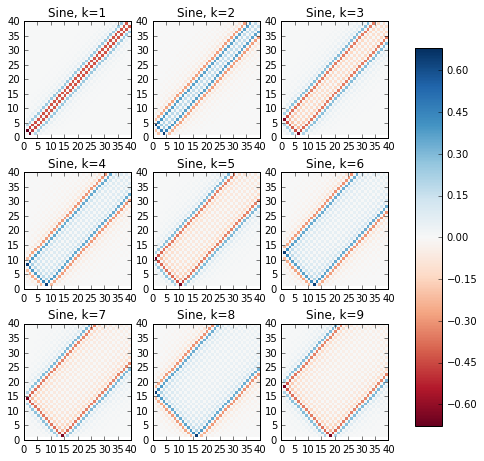

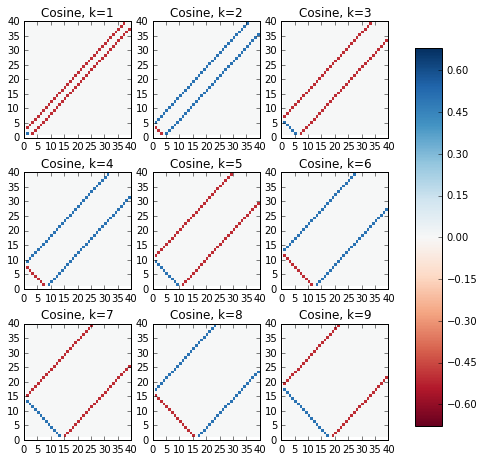

In [6]:
nrows = 3
ncols = 3
nplot = nrows * ncols
z_min, z_max = -np.abs(ZSs).max(), np.abs(ZSs).max()

# The Sines
plt.clf()
fig, axes = plt.subplots(nrows = nrows, ncols = ncols)
fig.subplots_adjust(hspace=0.3)
fig.set_size_inches(2.5*ncols,2.5*nrows)
subax = axes.flat

for i in range(0,nplot):
        im = subax[i].pcolor(X,Y, ZSs[::,::,i], cmap = 'RdBu', vmin = z_min, vmax = z_max)
        subax[i].set_title("Sine, k="+str(i+1))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
        
#plt.tight_layout()
plt.show()

# The Cosines
plt.clf()
fig, axes = plt.subplots(nrows = nrows, ncols = ncols)
fig.subplots_adjust(hspace=0.3)
fig.set_size_inches(2.5*ncols,2.5*nrows)
subax = axes.flat

for i in range(0,nplot):
        im = subax[i].pcolor(X,Y, ZCs[::,::,i], cmap = 'RdBu', vmin = z_min, vmax = z_max)
        subax[i].set_title("Cosine, k="+str(i+1))
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
        
#plt.tight_layout()
plt.show()

# The Hamiltonian matrix elements

In [7]:
def E0(n):
    return n**2 * np.pi**2 / 8.

E0ns = np.diag(E0(nbws))
print(VSns.shape, VCns.shape)
print(VSmnk.shape, VCmnk.shape)

# Be aware: for tensors, np.dot(A,B) sums over the last index of A
# and the SECOND-TO-LAST index of B. It appears that you cannot change this
Vmns = np.dot(VSns, np.transpose(VSmnk,axes=(0,2,1))) \
    + np.dot(VCns, np.transpose(VCmnk,axes=(0,2,1)))

Hmns = E0ns + Vmns
print(Vmns.shape)

(10000, 10) (10000, 10)
(40, 40, 10) (40, 40, 10)
(10000, 40, 40)


## Visualize the Hamiltonian matrices

In [8]:
X, Y = np.meshgrid(nbws,nbws)
ZSs = VSmnk[X-1,Y-1,::]
ZCs = VCmnk[X-1,Y-1,::]

nrows = 2
ncols = 2
nplot = nrows * ncols
Hints = randint(0,NV, nplot)
Hplot = Vmns[Hints]
z_min, z_max = -np.abs(Hplot).max(), np.abs(Hplot).max()

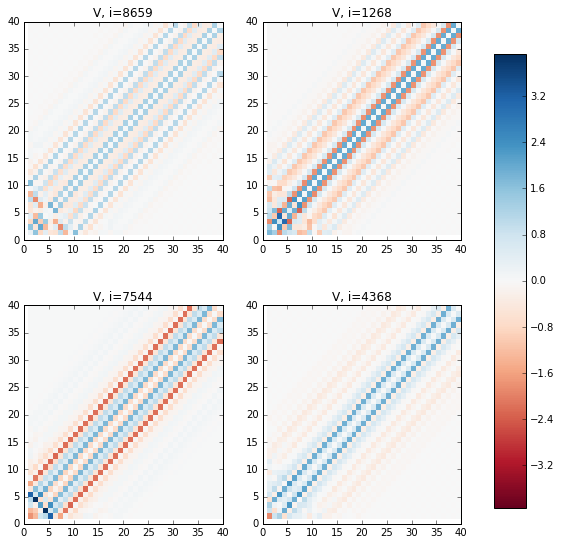

In [9]:
# The Sines
plt.clf()
fig, axes = plt.subplots(nrows = nrows, ncols = ncols)
fig.subplots_adjust(hspace=0.3)
fig.set_size_inches(4.5*ncols,4.5*nrows)
subax = axes.flat

for i in range(0,nplot):
        im = subax[i].pcolor(X,Y, Hplot[i], cmap = 'RdBu', vmin = z_min, vmax = z_max)
        subax[i].set_title("V, i="+str(Hints[i]))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
        
#plt.tight_layout()
plt.show()

# Eigenvalues

In [21]:
import time
start = time.time()
eigvals, eigvecs = np.linalg.eig(Hmns)
end = time.time()
print("Eigenvalues shape:", eigvals.shape)
print("Elapsed time:", end-start, "seconds")

Eigenvalues shape: (10000, 40)
Elapsed time: 5.657684087753296 seconds


In [46]:
idx = eigvals.argsort()
eigvals = np.asarray([eigvals[i,b] for i,b in enumerate(idx)])
eigvecs = np.asarray([eigvecs[i,:,b] for i,b in enumerate(idx)])

# Plot the potentials and eigenvalues

In [47]:
def VS(ns, xs):
    return np.sin(np.pi*np.outer(ns,xs))
def VC(ns, xs):
    return np.cos(np.pi*np.outer(ns,xs))

In [48]:
Nx = 100
xs = np.linspace(-1,1,100)
#Vgrid = legval(xs, np.transpose(Vns))
VSs = VS(ns,xs)
VCs = VC(ns,xs)

Vgrid = np.dot(VSns,VSs) + np.dot(VCns,VCs)

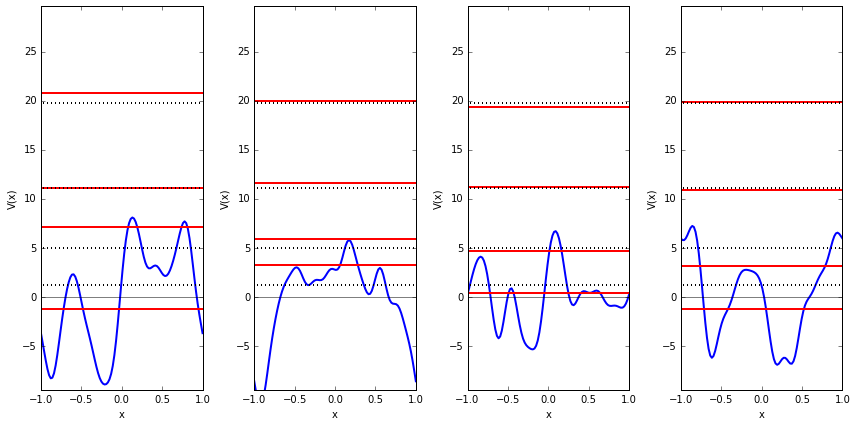

In [65]:
nrows = 1
ncols = 4
nplot = nrows * ncols
Vints = randint(0,NV, nplot)
Vplot = Vgrid[Vints,::]
eigplot = eigvals[Vints,::]
numeigs = 4

plt.clf()
fig, axes = plt.subplots(nrows = nrows, ncols = ncols)
fig.set_size_inches(3*ncols,6*nrows)
subax = axes.flat

for i in range(0,nplot):
        subax[i].plot(xs, Vplot[i], linewidth = 2)
        subax[i].axhline(y=0,xmin=-1,xmax=1, linestyle='solid' ,color = 'k', lw=0.5)
        for j in range(0, numeigs):
            subax[i].axhline(y=eigplot[i,j], xmin = -1, xmax = 1, 
                             ls = 'solid', color = 'r', lw =2)
            subax[i].axhline(y=E0(j+1), xmin = -1, xmax = 1, 
                             ls = 'dotted', color = 'k', lw = 2)
        subax[i].set_xlabel("x")
        subax[i].set_ylabel("V(x)")
        subax[i].set_ylim((-3*np.sqrt(V20),1.5*E0(numeigs)))

plt.tight_layout()
plt.show()

In [66]:
# Plot the probability distributions
def psi0(n,x):
    return np.sin(np.pi/2*np.outer(n,x+1))

psiComp = psi0(nbws,xs)
psi=np.dot(eigvecs,psiComp)
prob = psi**2

/Users/dhudsonsmith/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


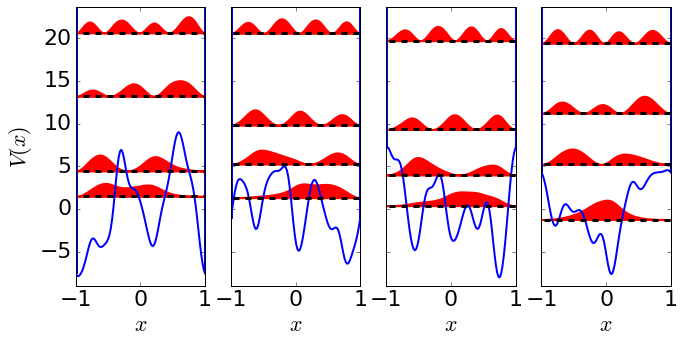

In [141]:
# Plot for presentation
# Font size
font = {'family': 'normal',
        'weight': 'normal',
        'size': 22}

plt.rc('font', **font)

nrows = 1
ncols = 4
nplot = nrows * ncols
Vints = randint(0,NV, nplot)
Vplot = Vgrid[Vints,::]
eigplot = eigvals[Vints,::]
numeigs = 4

plt.clf()
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharey='all', sharex='all')
fig.set_size_inches(8+8./3.,5)
subax = axes.flat

for i in range(0,nplot):
        subax[i].plot(xs, Vplot[i], linewidth = 2)
        for j in range(0, numeigs):
            subax[i].fill_between(xs, eigplot[i,j], eigplot[i,j]+1.5*prob[Vints[i],j], lw=2, color='r')
            subax[i].get_xaxis().set_ticks([-1,0,1])
#             subax[i].get_yaxis().set_ticks([])
            subax[i].axhline(y=eigplot[i,j], xmin = -1, xmax = 1, 
                             ls = 'dashed', color = 'k', lw =3)
            subax[i].vlines(x=-1, ymin = Vplot[i,0], ymax = 3*E0(numeigs), lw=3, color='b')
            subax[i].vlines(x=1, ymin = Vplot[i,-1], ymax = 3*E0(numeigs), lw=3, color='b')
        if i >= (nrows-1)*ncols:
            subax[i].set_xlabel("$x$")
        if i is 0 or i is ncols:
            subax[i].set_ylabel("$V(x)$")
        subax[i].set_ylim((-2.85*np.sqrt(V20),1.2*E0(numeigs)))

#plt.tight_layout()
plt.show()
fig.savefig("../Presentation/Plots/solution_ensemble.png")

# Distribution of the eigenvalues
We now examine the distribution of the eigenvalues. In particular, we plot the distributions of
$$
\Delta\epsilon_n = \frac{E_n - E_n^0}{\sqrt{\langle V_0^2 \rangle}}
$$
This is the shift in the energy for the $n^{\rm th}$ eigenvalue scaled by the variance in the first Fourier coefficient.

In [ ]:
deltaeps = (eigvals-np.diag(E0ns))/np.sqrt(V20)
print(deltaeps.shape)

In [ ]:
nrows = 10
ncols = 1
nplots = nrows*ncols
plt.clf()
fig, axes = plt.subplots(nrows, ncols)
fig.set_size_inches(8*ncols,1.5*nrows)
subax = axes.flat

nbins = 60
for i in range(0, nrows):
    subax[i].hist(deltaeps[::,i], nbins*(i+1), normed = 1, facecolor = 'green', 
                  alpha = 1, range = [-3,1])

plt.tight_layout()
plt.show()

We now calculate the standard deviation for each $\Delta\epsilon_n$. 

In [ ]:
mu = np.mean(deltaeps, axis = 0)
stddev = np.std(deltaeps, axis = 0)

In [ ]:
plt.clf()
plt.plot(range(1,11), stddev[0:10], color = 'b', lw = 2)
plt.plot(range(1,11), mu[0:10], color = 'r', lw = 2)

plt.tight_layout()
plt.show()

# Data Export
We will export an array containing the Fourier coefficients for each potential and the first 20 corresponding eigenvalues. The shape of the resulting array will be (NV, 2NB + 20). Keeping this shape in mind is critical when reading back in the data. 

In [ ]:
print(VSns.shape, VCns.shape, deltaeps.shape)

In [ ]:
# Output file:
outfilepath = "../Data/eigenvalues_NV" + str(NV) \
    + "_NB" + str(NB) + "_lam" \
    + str(lam) + "_V20" + str(V20) + ".npy"
outfilepathSD = "../Data/eigenvaluesSD_NV" + str(NV) \
    + "_NB" + str(NB) + "_lam" \
    + str(lam) + "_V20" + str(V20) + ".npy"


outData = np.concatenate((VSns, VCns, deltaeps), axis = 1)

In [ ]:
np.save(outfilepath, outData)
print(outData.shape)

np.save(outfilepathSD, stddev)
stddev.shape